In [1]:
import pandas as pd

## Greenhouse emission data

In [32]:
co2 = pd.read_csv('ghg/co2.csv')
ch4 = pd.read_csv('ghg/ch4.csv')
hfc = pd.read_csv('ghg/hfc.csv')
n2o = pd.read_csv('ghg/n2o.csv')
nf3 = pd.read_csv('ghg/nf3.csv')
pfc = pd.read_csv('ghg/pfc.csv')
sf6 = pd.read_csv('ghg/sf6.csv')

In [54]:
l = ch4.groupby('Year').sum()

In [ ]:
val = l['Value'].tolist()

## Ocean heat content

### load and renmaing columns

In [235]:
ocean = pd.read_csv('oceans/t00mn1.csv', delimiter=' ', header=None, dtype=np.float64)

In [236]:
ocean.columns = range(10)

In [237]:
ocean.to_csv('oceans/data.csv')

In [238]:
ocean = pd.DataFrame(data=ocean.values.reshape((5940, 360)), columns=range(360))

In [239]:
ocean = ocean.replace(-99.0, np.NaN)

In [241]:
import numpy as np

years = []
for i in range(66):
    y = [1955 + i] * 90
    years.extend(y)

years = np.array(years)

In [242]:
ocean['year'] = years

In [245]:
df = ocean.groupby('year').mean(axis=0)

UnsupportedFunctionCall: numpy operations are not valid with groupby. Use .groupby(...).mean() instead

In [244]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,350,351,352,353,354,355,356,357,358,359
year,,,,,,,,,,,,,,,,,,,,,
1955,13.384401,13.344266,13.368924,13.563371,13.267220,13.296147,13.241280,13.210954,13.463633,12.710297,...,14.042570,13.736287,13.986018,13.858552,13.285352,13.214446,13.667800,13.510207,13.206737,13.461064
1956,8.939459,9.729202,10.477505,10.606574,11.195674,9.710505,10.140136,10.116889,8.313275,5.044588,...,9.142776,8.244769,8.457577,7.876918,8.361429,8.088953,8.226339,7.833389,8.027394,8.278485
1957,13.307746,13.284551,13.287479,13.492217,13.234539,13.207399,13.143484,13.087773,13.097724,12.530609,...,13.985261,13.718567,14.175725,13.558973,13.217508,13.192724,13.630154,13.461187,13.151666,13.385556
1958,8.152102,8.909878,9.296630,9.206121,10.527832,9.051164,9.736803,10.028829,7.881197,4.743236,...,9.061935,7.752877,8.153738,7.354812,8.027631,7.496382,7.896097,7.289934,7.699249,7.957660
1959,13.166864,13.159173,13.169034,13.335225,13.066886,12.925750,12.854717,12.736667,12.695491,12.101373,...,13.914449,13.641347,14.080609,13.468861,13.120021,13.107697,13.539212,13.378679,13.066406,13.281686


In [206]:
ocean.to_csv('oceans/year_data.csv')

In [229]:
ocean['median'] = ocean.median(axis=0)
ocean['mean'] = ocean.mean(axis=0)
ocean['variance'] = ocean.var(axis=0)
ocean['max'] = ocean.max(axis=0)
ocean['min'] = ocean.min(axis=0)

In [230]:
ocean = ocean[['median', 'mean', 'variance', 'max', 'min', 'year']]

In [231]:
ocean.to_csv('oceans/summerized_data.csv')

In [232]:
l = ocean.groupby('year').median()

In [234]:
l

,median,mean,variance,max,min
year,,,,,
1955,NaN,NaN,NaN,NaN,NaN
1956,NaN,NaN,NaN,NaN,NaN
1957,NaN,NaN,NaN,NaN,NaN
1958,NaN,NaN,NaN,NaN,NaN
1959,NaN,NaN,NaN,NaN,NaN
1960,NaN,NaN,NaN,NaN,NaN
1961,NaN,NaN,NaN,NaN,NaN
1962,NaN,NaN,NaN,NaN,NaN
1963,NaN,NaN,NaN,NaN,NaN


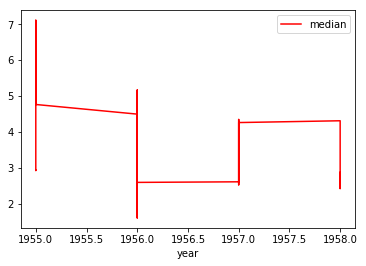

In [228]:
ocean.plot(kind='line',x='year',y='median',color='red')

In [57]:
base = val[-1]
arr = []
for value in val:
    arr.append((value - base)/base)

In [126]:
import numpy as np

arr = np.array([[1, 2], [3, 4], [5, 6]])

In [127]:
arr

array([[1, 2],
       [3, 4],
       [5, 6]])

In [128]:
arr.reshape((2, 3))

array([[1, 2, 3],
       [4, 5, 6]])